In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img =  cv2.pyrDown(cv2.imread("3.jpg", cv2.IMREAD_UNCHANGED))


ret, thresh = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                             127,255,cv2.THRESH_TOZERO_INV)

contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL,
                                     cv2.CHAIN_APPROX_SIMPLE)

In [8]:
for hi in hier:
    print(hi)

[[-1 -1 -1 -1]]


In [9]:
black = np.zeros_like(img)

for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    hull = cv2.convexHull(cnt)

    cv2.drawContours(black, [cnt], -1, (0, 255, 0), 2)
    cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
    cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)

In [10]:
cv2.imshow("hull", black)
cv2.waitKey()
cv2.destroyAllWindows()

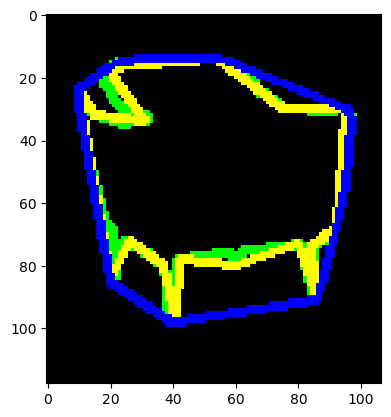

In [11]:
plt.imshow(black)